# Chata

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import importlib
import requests
from io import BytesIO
from PIL import Image
import numpy as np
from demo.predictor_chata import ChataDemo
from demo.predictor import COCODemo

import maskrcnn_benchmark.config as config

In [2]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

In [3]:
def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

In [4]:
#dataset.get_groundtruth(10)
#dataset.get_img_info(10)
#dataset.map_class_id_to_class_name(0)
#dataset.__getitem__(10)[0]

In [5]:
#importlib.reload(config)
#config.cfg

In [6]:
def load(url):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    response = requests.get(url)
    pil_image = Image.open(BytesIO(response.content)).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

In [7]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

## Working sample (boats, birds etc)

Model trained on COCO dataset 

In [8]:
config_file = "./configs/caffe2/e2e_mask_rcnn_R_50_FPN_1x_caffe2.yaml"
# update the config options with the config file
config.cfg.merge_from_file(config_file)
config.cfg.merge_from_list(["OUTPUT_DIR", "-"])

In [9]:
coco_demo = COCODemo(
    config.cfg,
    min_image_size=800,
    confidence_threshold=0.8,
)

Loading checkpoint from catalog://Caffe2Detectron/COCO/35858933/e2e_mask_rcnn_R-50-FPN_1x


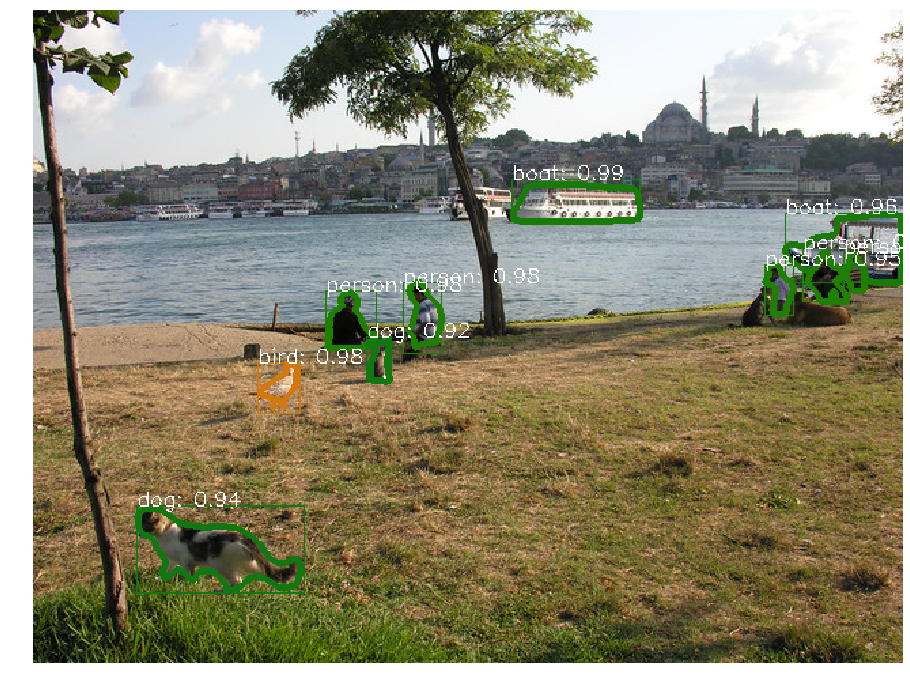

In [10]:
image = load("http://farm3.staticflickr.com/2469/3915380994_2e611b1779_z.jpg")
predictions = coco_demo.run_on_opencv_image(image)
imshow(predictions)

Model trainded on ImageNet - NOT WOKING...

In [8]:
config_file = "./configs/e2e_mask_rcnn_R_50_FPN_1x.yaml"
config.cfg.merge_from_file(config_file)
config.cfg.merge_from_list(["OUTPUT_DIR", "-"])

In [9]:
coco_demo = COCODemo(
    config.cfg,
    min_image_size=800,
    confidence_threshold=0.4,
)

Loading checkpoint from catalog://ImageNetPretrained/MSRA/R-50


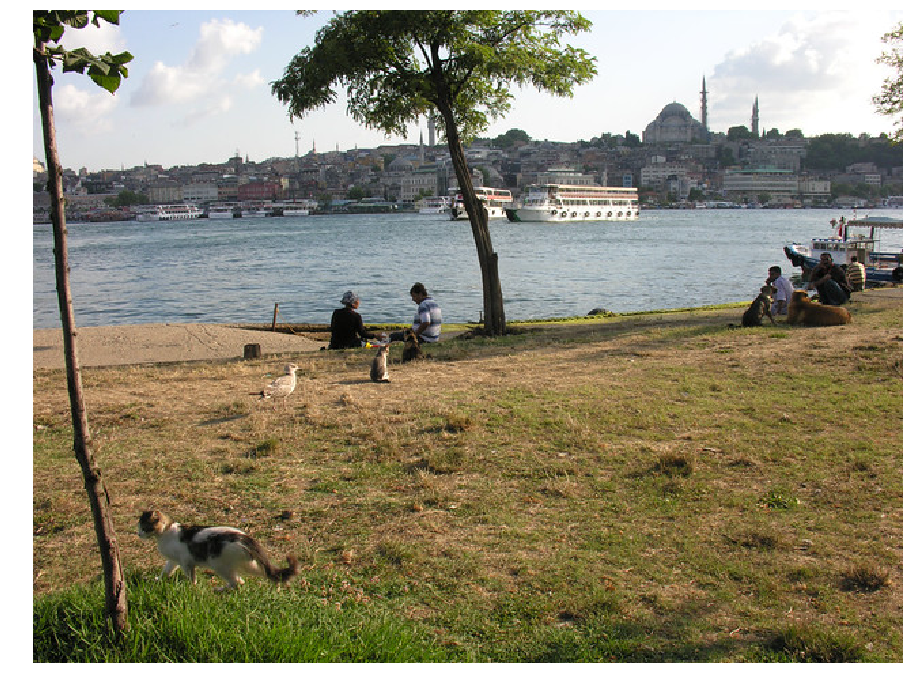

In [10]:
# from http://cocodataset.org/#explore?id=345434
image = load("http://farm3.staticflickr.com/2469/3915380994_2e611b1779_z.jpg")
#image = load("https://farm2.static.flickr.com/1397/1133086109_f4e141d805.jpg")

predictions = coco_demo.run_on_opencv_image(image)
imshow(predictions)

In [14]:
importlib.reload(config)

<module 'maskrcnn_benchmark.config' from '/home/machine/Database/Extract/maskrcnn-benchmark/maskrcnn_benchmark/config/__init__.py'>

# Charts and tables

In [8]:
from maskrcnn_benchmark.data.datasets.chata import ChartsDataset, TablesDataset
import imageio as imio
import os

In [9]:
# "train", "test", "val"
charts_dataset = ChartsDataset("./datasets/chata/charts", "val")
tables_dataset = TablesDataset("./datasets/chata/tables", "val")

In [10]:
def save_sample_results(element_name, chata_demo, dataset, dataset_type="val", img_range=(0,20)):
    
    os.makedirs(f"chata_results/{element_name}", exist_ok=True)

    for i in range(*img_range):
        test_img = np.array(dataset.__getitem__(i)[0])
        prediction = chata_demo.run_on_opencv_image(test_img)
        #imshow(prediction)
        imio.imwrite(f'chata_results/{element_name}/{dataset_type}_{i:2d}.jpg', prediction)

## Charts

In [11]:
config_file = "./configs/chata/e2e_faster_rcnn_R_50_C4_1x_1_gpu_voc_charts.yaml"
config.cfg.merge_from_file(config_file)
config.cfg.merge_from_list(["MODEL.DEVICE", "cpu"])
config.cfg.merge_from_list(["OUTPUT_DIR", "./weights/charts"])

chata_demo = ChataDemo(
    config.cfg,
    min_image_size=800,
    confidence_threshold=0.8,
)

Loading checkpoint from ./weights/charts/model_final.pth
[Checkpointer._load_file] Model loading: ./weights/charts/model_final.pth


In [13]:
save_sample_results("charts", chata_demo, charts_dataset)

Labels: {'Chart/Table': 1.0}
Labels: {'Chart/Table': 1.0}
Labels: {'Chart/Table': 1.0}
Labels: {'Chart/Table': 1.0}
Labels: {'Chart/Table': 1.0}
Labels: {'Chart/Table': 1.0}
Labels: {'Chart/Table': 1.0}
Labels: {'Chart/Table': 0.9975200295448303}
Labels: {'Chart/Table': 1.0}
Labels: {'Chart/Table': 1.0}
Labels: {'Chart/Table': 1.0}
Labels: {'Chart/Table': 1.0}
Labels: {'Chart/Table': 1.0}
Labels: {'Chart/Table': 1.0}
Labels: {'Chart/Table': 1.0}
Labels: {'Chart/Table': 1.0}
Labels: {'Chart/Table': 1.0}
Labels: {'Chart/Table': 0.9999996423721313}
Labels: {'Chart/Table': 1.0}
Labels: {'Chart/Table': 1.0}


## Tables

In [12]:
config_file = "./configs/chata/e2e_faster_rcnn_R_50_C4_1x_1_gpu_voc_tables.yaml"
config.cfg.merge_from_file(config_file)
config.cfg.merge_from_list(["MODEL.DEVICE", "cpu"])
#config.cfg.merge_from_list(["OUTPUT_DIR", "./weights/tables"])

chata_demo = ChataDemo(
    config.cfg,
    min_image_size=800,
    confidence_threshold=0.8,
)

Loading checkpoint from ./model_0062500.pth
[Checkpointer._load_file] Model loading: ./model_0062500.pth


In [22]:
save_sample_results("tables", chata_demo, tables_dataset)

Labels: {'Chart/Table': 0.9999985694885254}
Labels: {'Chart/Table': 0.9999128580093384}
Labels: {'Chart/Table': 0.9999977350234985}
Labels: {'Chart/Table': 0.9999973773956299}
Labels: {'Chart/Table': 1.0}
Labels: {'Chart/Table': 0.9999998807907104}
Labels: {'Chart/Table': 0.9999996423721313}
Labels: {'Chart/Table': 0.981955349445343}
Labels: {'Chart/Table': 0.9999949932098389}
Labels: {'Chart/Table': 0.9999768733978271}
Labels: {'Chart/Table': 1.0}
Labels: {'Chart/Table': 0.9998847246170044}
Labels: {'Chart/Table': 0.9999985694885254}
Labels: {'Chart/Table': 0.9999958276748657}
Labels: {'Chart/Table': 0.9999998807907104}
Labels: {'Chart/Table': 0.9909945130348206}
Labels: {'Chart/Table': 0.9999818801879883}
Labels: {'Chart/Table': 0.9999998807907104}
Labels: {'Chart/Table': 0.9999998807907104}
Labels: {'Chart/Table': 0.9999525547027588}


# Training loss

In [24]:
import re

In [25]:
def print_loss(element_name, dataset_type="val"):
    os.makedirs(f"./chata_results/{element_name}", exist_ok=True)
    with open(f"./weights/{element_name}/log.txt") as file:
        logs = file.read()

        for loss_type in ["loss", "loss_classifier", "loss_box_reg", "loss_objectness", "loss_rpn_box_reg"]:
            loss = re.findall(f"{loss_type}: [0-9]*.[0-9]* \([0-9]*.[0-9]*", logs)
            loss = [x[len(loss_type)+2:] for x in loss]
            
            iterations = re.findall(f"iter: [0-9]*", logs)
            iterations = [int(x[6:]) for x in iterations]
            
            plt.plot(iterations, [float(x.split("(")[0]) for x in loss])
            plt.plot(iterations, [float(x.split("(")[1]) for x in loss])
            plt.title(loss_type.upper())
            plt.xlabel('Iteration', fontsize=14)
            plt.ylabel('Loss value', fontsize=14)
            plt.savefig(f"./chata_results/{element_name}/{dataset_type}_{loss_type}.png")
            plt.clf()

In [26]:
print_loss("charts")

<Figure size 1440x864 with 0 Axes>

In [27]:
print_loss("tables")

<Figure size 1440x864 with 0 Axes>

# Test on real dataset

### Charts

In [12]:
import cv2

In [13]:
catalog_names = os.listdir("image_generation/images")
catalogs = [f"image_generation/images/{name}" for name in catalog_names]

In [14]:
element_name = "charts"

for catalog in catalogs:
    os.makedirs(f'{catalog}/{element_name}', exist_ok=True)
    for img_name in os.listdir(catalog):
        if "png" in img_name:
            test_img = cv2.imread(f"{catalog}/{img_name}")
            test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
            #imshow(test_img)
            prediction = chata_demo.run_on_opencv_image(test_img)
            imio.imwrite(f'{catalog}/{element_name}/{img_name}', prediction)

Labels: {}
Labels: {}
Labels: {}
Labels: {'Chart/Table': 0.9649712443351746}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {'Chart/Table': 0.9993021488189697}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {'Chart/Table': 0.9998664855957031}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {}
Labels: {'Chart/Table': 0.999993085861206}
Labels: {'Chart/Table': 0.9687712788581848}
Labels: {}
Labels: {}
Labels: {}
Labels: {'Chart/Table': 0.9441313743591309}
Labels: {'Chart/Table': 0.9928152561187744}
Labels: {}
Labels: {'Chart/Table': 0.9983853101730347}
Labels: {'Chart/Table': 0.9988496